In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten
from tensorflow.keras.callbacks import EarlyStopping

import numpy as np 
import matplotlib.pyplot as plt

In [6]:
x,y =  make_circles(n_samples=1000,noise=0.2)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)
y_train.shape

(800,)

**SIMPLE MODEL**

In [13]:
model = Sequential([
    Dense(64,input_dim=2,activation="relu"),
    Dense(32,input_dim=2,activation="relu"),
    Dense(1,activation="sigmoid")
])
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['acc'])
history = model.fit(x_train,y_train,epochs=1000,validation_data=(x_test,y_test))

Epoch 1/1000
25/25 [==============================] - 1s 6ms/step - loss: 0.6894 - acc: 0.5025 - val_loss: 0.6818 - val_acc: 0.5100
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6857 - acc: 0.5312 - val_loss: 0.6798 - val_acc: 0.5050
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6819 - acc: 0.5063 - val_loss: 0.6786 - val_acc: 0.5250
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6779 - acc: 0.5512 - val_loss: 0.6747 - val_acc: 0.5600
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6735 - acc: 0.6175 - val_loss: 0.6710 - val_acc: 0.5600
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6683 - acc: 0.6137 - val_loss: 0.6660 - val_acc: 0.5850
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6633 - acc: 0.6338 - val_loss: 0.6593 - val_acc: 0.6400
Epoch 8/1000
25/25 [==============================] - 0s 3ms/step - loss: 0.

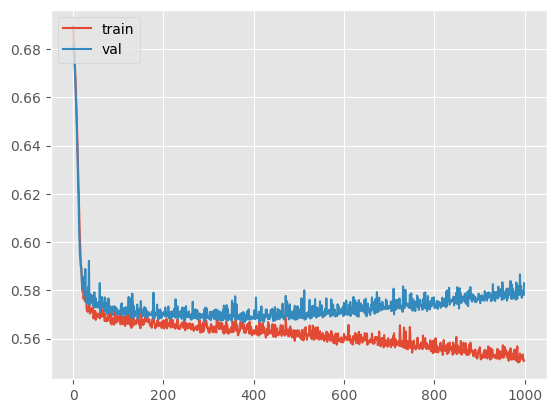

In [14]:
## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')

**The difference in val and training loss shows error is not reducing**

**MODEL WITH CALLBACK**

In [15]:
callback = EarlyStopping(
    monitor="val_loss",
    patience=20,
    restore_best_weights=True,
)

In [16]:
model_call = Sequential([
    Dense(64,input_dim=2,activation="relu"),
    Dense(32,input_dim=2,activation="relu"),
    Dense(1,activation="sigmoid")
])
model_call.compile(loss="binary_crossentropy",optimizer="adam",metrics=['acc'])
history = model_call.fit(x_train,y_train,epochs=1000,callbacks=[callback],validation_data=(x_test,y_test))

Epoch 1/1000
25/25 [==============================] - 1s 7ms/step - loss: 0.7005 - acc: 0.5013 - val_loss: 0.6922 - val_acc: 0.4900
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6903 - acc: 0.4975 - val_loss: 0.6879 - val_acc: 0.5000
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6873 - acc: 0.5000 - val_loss: 0.6863 - val_acc: 0.5000
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6848 - acc: 0.5050 - val_loss: 0.6842 - val_acc: 0.5000
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6820 - acc: 0.5312 - val_loss: 0.6801 - val_acc: 0.5250
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6778 - acc: 0.5763 - val_loss: 0.6765 - val_acc: 0.5550
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.6734 - acc: 0.6150 - val_loss: 0.6713 - val_acc: 0.6150
Epoch 8/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.

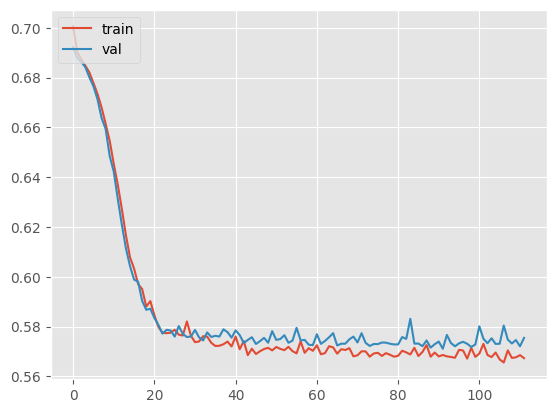

In [17]:

## Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(["train", "val"],loc='upper left')